In [2]:
import tensorflow.keras as keras
from tensorflow.keras.datasets import cifar10 # veri kümesi

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential # yapay sinir ağı modeli
#giriş katmanından başlayarak sıralı olarak birbirini takip eden katmanlar eklenir ve çıktı katmanına kadar devam eder.

from tensorflow.keras.layers import Conv2D # 2 Boyutlu veriler üzerinde evrişim işlemi gerçekleştirir
from tensorflow.keras.layers import MaxPooling2D # Önemli özellikleri korumak için kullanılır.
from tensorflow.keras.layers import Flatten # tek boyutlu veriye dönüştürür
from tensorflow.keras.layers import Dense # full connected bağlantıları temsil eder.

import matplotlib.pyplot as plt
import numpy as np

In [3]:
# CIFAR-10 veri kümesini okuma

(x_train,y_train),(x_test,y_test)= cifar10.load_data()

170498071/170498071 [==============================] - 213s 1us/step


In [4]:
len(x_train)

50000

In [5]:
x_train.shape

(50000, 32, 32, 3)

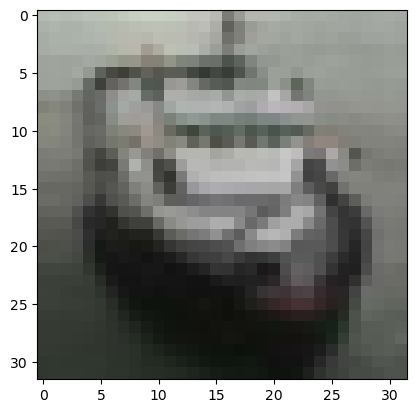

In [8]:
image=x_train[170]
plt.figure()
plt.imshow(image)

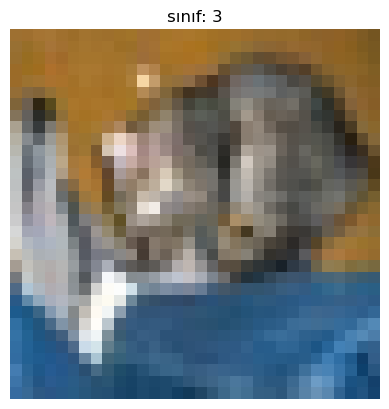

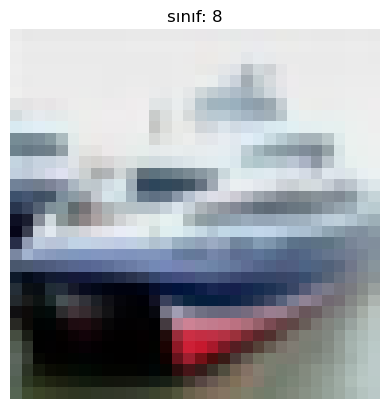

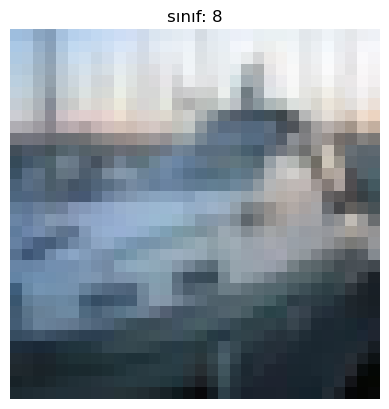

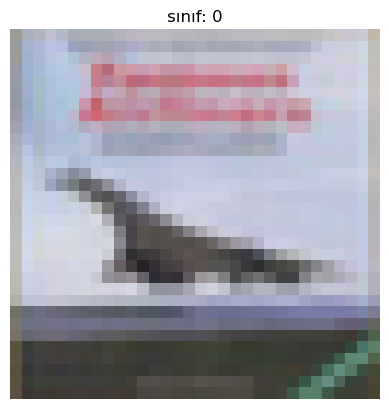

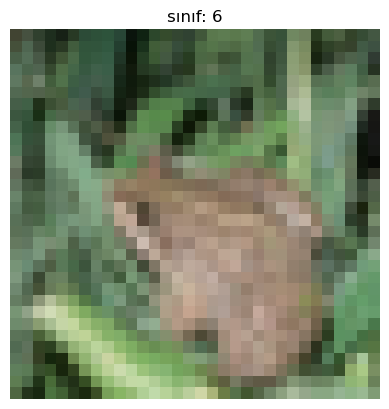

In [10]:
for i in range(5):
    plt.imshow(x_test[i])
    plt.title("sınıf: "+str(y_test[i][0]))
    plt.axis("off")
    plt.show()

In [11]:
# eğitim ve test verilerinin birleştirilmesi

x_data = np.concatenate((x_train,x_test),axis=0)
y_data = np.concatenate((y_train,y_test),axis=0)

In [12]:
len(x_data)

60000

In [13]:
len(y_data)

60000

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.2,random_state=42)


In [16]:
len(x_train)

48000

In [18]:
# verilerin 0-1 arasında normalize edilmesi
# her bir piksel 0 ile 1 arasında bir değere dönüşür
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [19]:
x_train[100]

array([[[1.2764322e-03, 1.3533257e-03, 1.5686274e-03],
        [1.2764322e-03, 1.3379470e-03, 1.5532487e-03],
        [1.3533257e-03, 1.4302192e-03, 1.6455210e-03],
        ...,
        [2.5221070e-03, 2.5067283e-03, 2.4298348e-03],
        [2.4759709e-03, 2.4605922e-03, 2.3836987e-03],
        [2.4298348e-03, 2.4298348e-03, 2.3529413e-03]],

       [[1.4917339e-03, 1.4917339e-03, 1.6147635e-03],
        [1.5686274e-03, 1.5686274e-03, 1.6916571e-03],
        [1.5840061e-03, 1.5840061e-03, 1.7224145e-03],
        ...,
        [2.6297579e-03, 2.5682431e-03, 2.4759709e-03],
        [2.5836218e-03, 2.5221070e-03, 2.4298348e-03],
        [2.5528644e-03, 2.4913496e-03, 2.3990774e-03]],

       [[1.6916571e-03, 1.6301422e-03, 1.6762784e-03],
        [1.7531719e-03, 1.6916571e-03, 1.7377932e-03],
        [1.7839293e-03, 1.7224145e-03, 1.7839293e-03],
        ...,
        [2.7527874e-03, 2.6143792e-03, 2.4913496e-03],
        [2.6912726e-03, 2.5528644e-03, 2.4452135e-03],
        [2.6605153e-03

In [20]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

In [21]:
x_train.shape[1:]

(32, 32, 3)

In [22]:
x_train[0].shape

(32, 32, 3)

In [23]:
# CNN MODEL

model=Sequential()

model.add(Conv2D(32,(3,3),activation="relu",padding="same",input_shape=x_train.shape[1:])) # 3*3 lük filtre uygular
#relu : negatif değerleri sıfır yapar pozitif kısımları korur
#padding: çıktı boyutunun giriş boyutuna benzerliğini sağlar

#giriş kanal sayısı : 3
#çıkış kanal sayısı : 32
#her bir filtre için toplam parametre sayısı : 3*3*3 +1(bias) = 28
#genel toplam parametre : 28*32 = 896

model.add(Conv2D(32,(3,3),activation="relu"))

#filtre = 3*3
#giriş kanal sayısı = 32
#çıkış kanal sayısı = 32
#her bir filtre için toplam parametre sayısı: (3*3*32) +1(bias)=289
#genel toplam parametre: 9248

model.add(MaxPooling2D(pool_size=(2,2))) # belirli bir bölgedeki en büyük değeri alır

model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(Conv2D(64,(3,3),activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(512,activation="relu"))
model.add(Dense(num_classes,activation="softmax")) #softmax ile elemanların olasılık değerlerini döndürür

In [24]:
# modelin derlenmesi

model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=["accuracy"])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                    

In [27]:
# model eğitme
batch_size = 128
epochs = 10
model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test,y_test))

Epoch 1/10
375/375 [==============================] - 68s 178ms/step - loss: 2.3028 - accuracy: 0.0995 - val_loss: 2.3027 - val_accuracy: 0.0936
Epoch 2/10
375/375 [==============================] - 64s 171ms/step - loss: 2.3027 - accuracy: 0.1010 - val_loss: 2.3028 - val_accuracy: 0.0936
Epoch 3/10
375/375 [==============================] - 64s 172ms/step - loss: 2.3027 - accuracy: 0.0996 - val_loss: 2.3028 - val_accuracy: 0.0936
Epoch 4/10
375/375 [==============================] - 64s 172ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3030 - val_accuracy: 0.0936
Epoch 5/10
375/375 [==============================] - 64s 170ms/step - loss: 2.3027 - accuracy: 0.0991 - val_loss: 2.3029 - val_accuracy: 0.0936
Epoch 6/10
375/375 [==============================] - 64s 172ms/step - loss: 2.3026 - accuracy: 0.1016 - val_loss: 2.3029 - val_accuracy: 0.0936
Epoch 7/10
375/375 [==============================] - 65s 173ms/step - loss: 2.3027 - accuracy: 0.1010 - val_loss: 2.3028 - val_ac

In [28]:
scores = model.evaluate(x_test,y_test,verbose=1)
print("test loss: ",scores[0])
print("test accuracy: ",scores[1])

375/375 [==============================] - 5s 13ms/step - loss: 2.3028 - accuracy: 0.0936
test loss:  2.3028059005737305
test accuracy:  0.09358333051204681
